<a href="https://colab.research.google.com/github/maximsachs/SEN163A_Assignment1/blob/main/SEN163A_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset downloader


In [93]:
!pip install wget

In [158]:
!wget https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996

--2021-02-17 14:06:31--  https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996
Resolving youtransfer.cryptobro.eu (youtransfer.cryptobro.eu)... 80.114.140.180
Connecting to youtransfer.cryptobro.eu (youtransfer.cryptobro.eu)|80.114.140.180|:39862... failed: Connection timed out.
Retrying.

--2021-02-17 14:07:04--  (try: 2)  https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996
Connecting to youtransfer.cryptobro.eu (youtransfer.cryptobro.eu)|80.114.140.180|:39862... failed: Connection timed out.
Retrying.

--2021-02-17 14:07:37--  (try: 3)  https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996
Connecting to youtransfer.cryptobro.eu (youtransfer.cryptobro.eu)|80.114.140.180|:39862... failed: Connection timed out.
Retrying.

--2021-02-17 14:08:12--  (try: 4)  https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996
Connecting

In [139]:
# Better downloading utility
import os
import wget

files_to_get = ["https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test.csv", 
                "https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test_100k.csv"]

files_to_get.append("https://youtransfer.cryptobro.eu:39862/files/21a410831730++4dd5dd57-f88d-4ea0-b6c7-cbe7d5307996")
  
files_already_downloaded = os.listdir()
for file_url in files_to_get:
  filename = file_url.split("/")[-1]
  if not filename in files_already_downloaded:
    print(f"Downloading {filename}")
    wget.download(file_url)
  else:
    print(f"File {filename} has already been downloaded")

File transactions_test.csv has already been downloaded
File transactions_test_100k.csv has already been downloaded


URLError: ignored

#Assignment 1

In [119]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
graphs_folder = "graphs"
if not os.path.exists(graphs_folder):
  os.makedirs(graphs_folder)

In [151]:
# Opening the sample data file:
# Whole dataset 7734835 transactions.csv
# df = pandas.read_csv("transactions_test.csv")
df = pandas.read_csv("transactions_test_100k.csv")

In [97]:
df

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.0,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20
99995,10,TRANSFER,257542.70,C1059586996,0.0,-257542.70,C629456317,338384.36,595927.06
99996,10,TRANSFER,2096963.46,C1169803028,35806.0,-2061157.46,C721267591,3124831.25,5221794.71
99997,10,TRANSFER,0.01,C663650418,0.0,-0.01,C52983754,175.20,175.21


Assignment Tasks:
1.  Describe the dataset you received, in words and with supporting visualizations.
2.  Check the dataset for consistency, and document any inconsistency you find, as well
as reasons for these inconsistencies.
3.  Identify all fraudulent activity within the dataset, and provide supporting evidence
and visualizations.
4.  Document your method and code used during the investigation




## Describe the dataset

In [155]:
description = df.describe()
print(f"There are {df.shape[0]} transactions in the dataset.")
mean_transaction = description.loc["mean", "amount"]
median_transaction =  df["amount"].median()
total_transaction =  df["amount"].sum()
print(f"The mean transaction has a value of {mean_transaction}, median transaction is {median_transaction} and a total of {total_transaction} was transacted.")
description

There are 99999 transactions in the dataset.
The mean transaction has a value of 138887.98222505263, median transaction is 20590.9 and a total of 13888659334.519999 was transacted.


,timestamp,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,99999.000000,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04
mean,8.180812,1.388880e+05,8.787216e+05,7.398337e+05,9.084628e+05,1.047351e+06
std,1.859819,3.123212e+05,2.695813e+06,2.715239e+06,2.529415e+06,2.635457e+06
min,1.000000,1.000000e-02,0.000000e+00,-6.071488e+06,0.000000e+00,2.000000e-02
25%,8.000000,3.057005e+03,0.000000e+00,-7.868053e+04,0.000000e+00,3.451060e+03
50%,9.000000,2.059090e+04,1.973500e+04,-1.000000e-02,1.454800e+02,3.082799e+04
75%,9.000000,1.648696e+05,1.761339e+05,1.192076e+05,6.223648e+05,8.909761e+05
max,10.000000,1.000000e+07,3.379739e+07,3.358605e+07,3.529756e+07,3.560363e+07


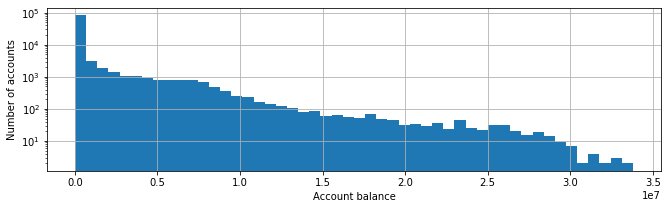

In [152]:
ax = df["oldbalanceOrig"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of accounts")
ax.set_xlabel("Account balance")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_account_balances_old.pdf"), bbox_inches='tight')

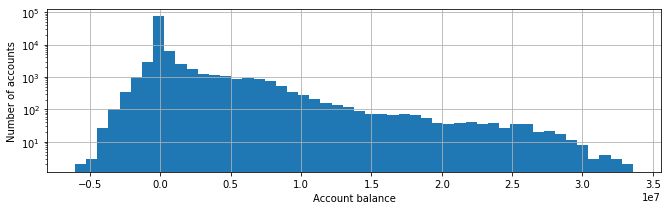

In [156]:
ax = df["newbalanceOrig"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of accounts")
ax.set_xlabel("Account balance")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_account_balances_new.pdf"), bbox_inches='tight')

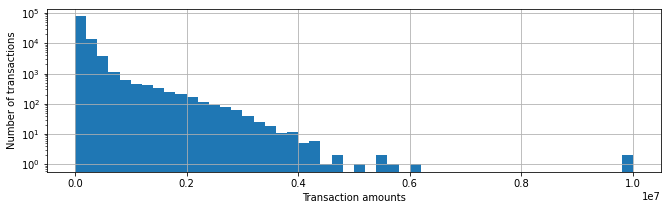

In [154]:
ax = df["amount"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of transactions")
ax.set_xlabel("Transaction amounts")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_Transaction_amounts.pdf"), bbox_inches='tight')

Richest account has 33586046.12


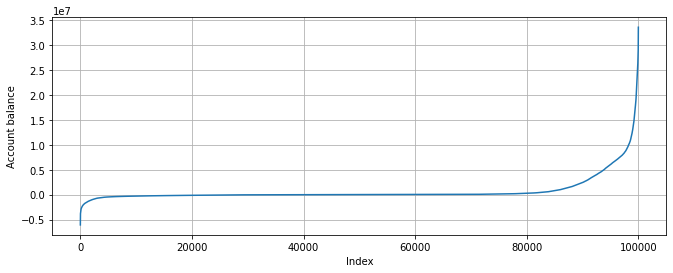

In [115]:
account_balances = df["newbalanceOrig"].copy()
account_balances.sort_values(inplace=True)
account_balances.index = list(range(account_balances.shape[0]))
ax = account_balances.plot()
ax.grid()
ax.set_ylabel("Account balance")
ax.set_xlabel("Index")
fig = plt.gcf()
fig.set_size_inches(11, 4)
plt.savefig(os.path.join(graphs_folder, "Account_balance_distribution.pdf"), bbox_inches='tight')
richest_balance = account_balances.iloc[-1]
print(f"Richest account has {richest_balance}")

In [101]:
top_to_show = 0.01
top_index = int(account_balances.shape[0]*(1-top_to_show))
portion_of_wealth = account_balances.iloc[top_index:].sum()/account_balances.sum()
print(f"The top {top_to_show*100}% of addresses own {portion_of_wealth*100}% of the wealth")

The top 1.0% of addresses own 26.02953391047483% of the wealth


## similarity of transactions (same transactions from the same account multiple times)

In [157]:
transactions_by_amount = df.groupby("amount")["nameOrig"].apply(list)
count_per_name = defaultdict(lambda: 0)
for tx in transactions_by_amount:
  for name in tx:
    count_per_name[name] += 1
count_per_name
accounts = df["nameOrig"]
df["account_tx_count"] = np.nan
for index, account in zip(accounts.index, accounts):
  df.loc[index, "account_tx_count"] = count_per_name[account]
transactions_with_more_than_1 = df[df["account_tx_count"] > 1]
transactions_with_more_than_1

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,account_tx_count
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02,2.0
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63,2.0
6,1,TRANSFER,0.01,C90045638,53860.0,53859.99,C52983754,0.02,0.03,2.0
7,1,TRANSFER,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,7817.70,2.0
13,1,TRANSFER,0.01,C249177573,20771.0,20770.99,C52983754,0.03,0.04,2.0
...,...,...,...,...,...,...,...,...,...,...
99992,10,TRANSFER,313006.87,C2093208283,0.0,-313006.87,C480267345,1352131.50,1665138.36,2.0
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20,2.0
99995,10,TRANSFER,257542.70,C1059586996,0.0,-257542.70,C629456317,338384.36,595927.06,2.0
99997,10,TRANSFER,0.01,C663650418,0.0,-0.01,C52983754,175.20,175.21,2.0


## transactions above certain amounts (very large, or very small)

In [102]:
large_amount = 1000000
large_transactions = df[df["amount"] > large_amount]
print(f"There are {large_transactions.shape[0]} transactions with an amount larger than {large_amount}.")
large_transactions

There are 2324 transactions with an amount larger than 1000000.


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
112,1,TRANSFER,1505626.01,C926859124,0.00,-1505626.01,C665576141,29031.00,1534657.00
117,1,TRANSFER,1429051.47,C1520267010,0.00,-1429051.48,C1590550415,2041543.60,3470595.07
123,1,TRANSFER,1724887.05,C1495608502,0.00,-1724887.05,C1590550415,3470595.07,5195482.12
435,1,TRANSFER,1538200.39,C476579021,0.00,-1538200.40,C1590550415,7005520.36,8543720.74
436,1,TRANSFER,2421578.09,C106297322,0.00,-2421578.10,C1590550415,8543720.74,10965298.83
...,...,...,...,...,...,...,...,...,...
99619,10,TRANSFER,1246086.26,C1507729543,469768.88,-776317.39,C1268508281,328412.28,1574498.53
99789,10,TRANSFER,3195990.97,C357432348,11354.00,-3184636.97,C1825316952,282818.05,3478809.02
99974,10,TRANSFER,1886084.40,C545466595,561754.92,-1324329.48,C509689894,649028.15,2535112.54
99984,10,TRANSFER,2548723.43,C1129845061,492.00,-2548231.44,C1642244192,95700.34,2644423.77


In [103]:
small_amount = 0.1
small_transactions = df[df["amount"] < small_amount]
print(f"There are {small_transactions.shape[0]} transactions with an amount smaller than {small_amount}.")
small_transactions

There are 17520 transactions with an amount smaller than 0.1.


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02
6,1,TRANSFER,0.01,C90045638,53860.0,53859.99,C52983754,0.02,0.03
13,1,TRANSFER,0.01,C249177573,20771.0,20770.99,C52983754,0.03,0.04
16,1,TRANSFER,0.01,C1716932897,10127.0,10126.99,C52983754,0.04,0.05
20,1,TRANSFER,0.01,C761750706,450.0,449.99,C52983754,0.05,0.06
...,...,...,...,...,...,...,...,...,...
99987,10,TRANSFER,0.01,C1060711654,0.0,-0.01,C52983754,175.16,175.17
99989,10,TRANSFER,0.01,C1013502077,0.0,-0.01,C52983754,175.17,175.18
99991,10,TRANSFER,0.01,C2093208283,0.0,-0.01,C52983754,175.18,175.19
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20


In [104]:
# Transactions where a large portion of the original balance is being sent:
# This is not so useful as a measure, since often times accounts can go into a negative balance (debt).
amount_to_balance_ratio = 1
high_ratio_transactions = df[(df["amount"] / df["oldbalanceOrig"]) > amount_to_balance_ratio]
high_ratio_transactions

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
10,1,TRANSFER,4024.36,C1265012928,2671.0,-1353.36,M1176932104,0.00,4024.36
12,1,TRANSFER,9644.94,C1900366749,4465.0,-5179.94,C997608398,10845.00,20489.94
17,1,TRANSFER,11633.76,C1716932897,10127.0,-1506.76,M801569151,0.00,11633.75
19,1,TRANSFER,229133.94,C905080434,15325.0,-213808.94,C476402209,5083.00,234216.94
21,1,TRANSFER,1563.82,C761750706,450.0,-1113.82,M1731217984,0.00,1563.81
...,...,...,...,...,...,...,...,...,...
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20
99995,10,TRANSFER,257542.70,C1059586996,0.0,-257542.70,C629456317,338384.36,595927.06
99996,10,TRANSFER,2096963.46,C1169803028,35806.0,-2061157.46,C721267591,3124831.25,5221794.71
99997,10,TRANSFER,0.01,C663650418,0.0,-0.01,C52983754,175.20,175.21


## same transactions from multiple different accounts

## See accounts with unusually many transactions, or receiving unusually many transactions. Number of times an account is used (only once?)

In [105]:
amount_received_per_nameDest = df.groupby("nameDest")["amount"].agg(['mean', 'count', 'sum'])
amount_received_per_nameDest.sort_values("count", inplace=True, ascending=False)
top_address_transaction_count = amount_received_per_nameDest.iloc[0]["count"]
top_address_transaction_sum = amount_received_per_nameDest.iloc[0]["sum"]
print(f"The top account receives {int(top_address_transaction_count)} which corresponds to a total transaction amount received of {top_address_transaction_sum}.")

amount_received_per_nameDest

The top account receives 17520 which corresponds to a total transaction amount received of 175.19999999998564.


,mean,count,sum
nameDest,,,
C52983754,0.010000,17520,175.20
C985934102,357314.070256,78,27870497.48
C248609774,480120.992754,69,33128348.50
C1286084959,361121.778406,69,24917402.71
C1590550415,510757.308507,67,34220739.67
...,...,...,...
M1548062336,663.070000,1,663.07
M1548056691,2844.830000,1,2844.83
M1547971047,1433.340000,1,1433.34


In [106]:
print("Middle man addresses might be malicious if they often receive amounts and then immediately send it onwards.")
print("This could beamount_sent_per_nameOrig identified by comparing the total amount received by an address to the total amount being sent by an address.")
amount_sent_per_nameOrig = df.groupby("nameOrig")["amount"].agg(['mean', 'count', 'sum'])
amount_sent_per_nameOrig.sort_values("count", inplace=True, ascending=False)
amount_sent_per_nameOrig

Middle man addresses might be malicious if they often receive amounts and then immediately send it onwards.
This could beamount_sent_per_nameOrig identified by comparing the total amount received by an address to the total amount being sent by an address.


,mean,count,sum
nameOrig,,,
C1543420346,6758.975,2,13517.95
C1396601788,1771.535,2,3543.07
C344714901,66651.195,2,133302.39
C13968609,518615.445,2,1037230.89
C344682389,14130.390,2,28260.78
...,...,...,...
C1723684287,11125.920,1,11125.92
C1723723902,11350.220,1,11350.22
C1723756239,305004.670,1,305004.67


In [107]:
# Lets see if there is overlap between the addresses receiving transactions and those sending.
# At the moment 0 interesections are found, but this could be an artefact of limiting to the top 100k transactions.
set_receiving_addresses = set(amount_received_per_nameDest.index.values)
set_sending_addresses = set(amount_sent_per_nameOrig.index.values)
addresses_both_sending_and_receiving = set_receiving_addresses.intersection(set_sending_addresses)
print(f"There are {len(addresses_both_sending_and_receiving)} addresses both sending and receiving.")

There are 0 addresses both sending and receiving.


## internal consistency of old \& new balances

In [108]:
# There are a number of transactions where likely rounding error has occured. 
# This is broadly speaking not a problem it is in most cases a small amount only, so 0.01. But in the mass it appears quite substantial.
# See the movie office space for more ideas on how to use rounding errors in the banking system.
inconsistent_old_balances = df[np.invert(np.isclose(df["oldbalanceOrig"] - df["amount"], df["newbalanceOrig"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_old_balances["old_balance_error"] = df["oldbalanceOrig"] - df["amount"] - df["newbalanceOrig"]
print(inconsistent_old_balances["old_balance_error"].describe())
print("Total loss rounded away:", inconsistent_old_balances["old_balance_error"].sum())
# ax = inconsistent_old_balances["old_balance_error"].hist(bins=50)
# ax.set_yscale('log')
# print(ax.get_xlim())
inconsistent_old_balances

count    1.091400e+04
mean     1.000000e-02
std      1.877233e-11
min      1.000000e-02
25%      1.000000e-02
50%      1.000000e-02
75%      1.000000e-02
max      1.000000e-02
Name: old_balance_error, dtype: float64
Total loss rounded away: 109.14000001334566


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,old_balance_error
5,1,TRANSFER,11668.14,C2048537720,41554.00,29885.85,M1230701703,0.00,11668.14,0.01
9,1,TRANSFER,7861.64,C1912850431,176087.23,168225.58,M633326333,0.00,7861.64,0.01
22,1,TRANSFER,1157.86,C1237762639,21156.00,19998.13,M1877062907,0.00,1157.86,0.01
31,1,TRANSFER,3876.41,C504336483,67852.00,63975.58,M1404932042,0.00,3876.41,0.01
41,1,TRANSFER,3448.92,C2103763750,0.00,-3448.93,M335107734,0.00,3448.91,0.01
...,...,...,...,...,...,...,...,...,...,...
99930,10,TRANSFER,24275.48,C832177998,6157.00,-18118.49,M143711050,0.00,24275.47,0.01
99938,10,TRANSFER,6194.59,C1010375664,96.00,-6098.60,M1739868556,0.00,6194.59,0.01
99949,10,TRANSFER,6803.43,C468419547,0.00,-6803.44,M307252369,0.00,6803.43,0.01
99950,10,TRANSFER,37247.49,C951117154,0.00,-37247.50,M407391297,0.00,37247.49,0.01


In [109]:
# For the destination balances in some cases also 2 cents are obtained. which is very odd.
inconsistent_new_balances = df[np.invert(np.isclose(df["oldbalanceDest"] + df["amount"], df["newbalanceDest"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_new_balances["new_balance_error"] = df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]
print(inconsistent_new_balances["new_balance_error"].describe())
total_rounding_error = inconsistent_new_balances["new_balance_error"].sum()
print("Total loss rounded away:", total_rounding_error)
# ax = inconsistent_new_balances["new_balance_error"].hist(bins=50)
# ax.set_yscale('log')
inconsistent_new_balances

count    23317.000000
mean         0.009569
std          0.003995
min         -0.010000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.020000
Name: new_balance_error, dtype: float64
Total loss rounded away: 223.1100000299097


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,new_balance_error
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63,0.01
7,1,TRANSFER,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,7817.70,0.01
14,1,TRANSFER,3099.97,C249177573,20771.0,17671.03,M2096539129,0.00,3099.96,0.01
17,1,TRANSFER,11633.76,C1716932897,10127.0,-1506.76,M801569151,0.00,11633.75,0.01
18,1,TRANSFER,4098.78,C1026483832,503264.0,499165.22,M1635378213,0.00,4098.77,0.01
...,...,...,...,...,...,...,...,...,...,...
99978,10,TRANSFER,671.58,C1287430210,124245.0,123573.42,C141854285,356182.18,356853.75,0.01
99979,10,TRANSFER,741956.09,C1967217926,3081.0,-738875.09,C995442141,0.00,741956.08,0.01
99982,10,TRANSFER,61364.18,C362401534,20637.0,-40727.18,C24955689,406685.77,468049.94,0.01
99988,10,TRANSFER,316104.07,C1060711654,0.0,-316104.07,C259443926,750506.53,1066610.58,0.02


In [110]:
print("This rounding error corresponds to ", total_rounding_error/df["amount"].sum(), "of the amount transacted")
print("and to ", total_rounding_error/df["newbalanceOrig"].sum(), "of the total balances")
error_per_tick = total_rounding_error/df["timestamp"].iloc[-1]
ticks_till_gone = 0.5*df["newbalanceOrig"].sum()/error_per_tick
print("At this rate of transacting this correspnds to",ticks_till_gone , "ticks until half the total balance has been lost to rounding.")
print("which, assuming 1 tick per second, is the equivalent of", ticks_till_gone/(86400*365), "years")

This rounding error corresponds to  1.606418550963908e-08 of the amount transacted
and to  3.015708038777585e-09 of the total balances
At this rate of transacting this correspnds to 1657985433.505939 ticks until half the total balance has been lost to rounding.
which, assuming 1 tick per second, is the equivalent of 52.57437320858508 years


## timestamps with unusual high activity

,mean,count,sum
timestamp,,,
1,86915.099546,3284,2.854292e+08
2,70775.622751,1214,8.592161e+07
3,63202.752920,685,4.329389e+07
4,105820.072293,689,7.291003e+07
5,57077.808371,798,4.554809e+07
6,81827.965488,2008,1.643106e+08
7,100063.770917,8324,8.329308e+08
8,134785.941909,25519,3.439602e+09
9,153396.500614,45688,7.008379e+09


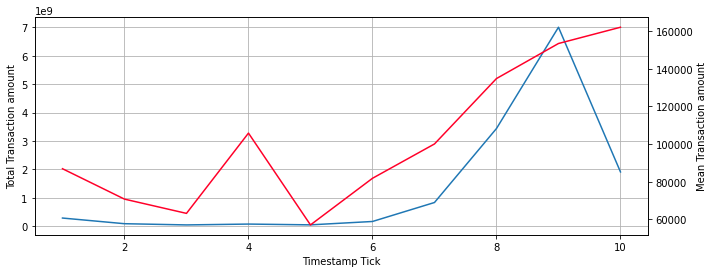

In [111]:
transactoins_per_timestamp = df.groupby("timestamp")["amount"].agg(['mean', 'count', 'sum'])
ax = transactoins_per_timestamp["sum"].plot()
ax.set_ylabel("Total Transaction amount")
ax2 = ax.twinx()
ax2.set_ylabel("Mean Transaction amount")
ax.set_xlabel("Timestamp Tick")
ax.grid()
transactoins_per_timestamp["mean"].plot(ax=ax2, colormap="gist_rainbow")
fig = plt.gcf()
fig.set_size_inches(11, 4)
plt.savefig(os.path.join(graphs_folder, "transactions_per_tick.pdf"), bbox_inches='tight')
transactoins_per_timestamp

## Someone sending to themselves, destination address equals origin.

In [112]:
# The following output is empty, so no transaction is sending to itself.
df[df["nameOrig"] == df["nameDest"]]

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
